# Maladie de Parkinson, segmentation par probabilité de développer la maladie

In [519]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Import du dataset 

In [520]:
data = pd.read_csv("dataset_2.csv")

In [521]:
data.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,18. Speech,19. Facial Expression,20. Tremor at Rest - head,20. Tremor at Rest - RUE,20. Tremor at Rest - LUE,20. Tremor at Rest - RLE,20. Tremor at Rest - LLE,21. Action or Postural Tremor - RUE,21. Action or Postural Tremor - LUE,22. Rigidity - neck,22. Rigidity - RUE,22. Rigidity - LUE,22. Rigidity - RLE,22. Rigidity - LLE,23.Finger Taps - RUE,23.Finger Taps - LUE,24. Hand Movements - RUE,24. Hand Movements - LUE,25. Rapid Alternating Movements - RUE,25. Rapid Alternating Movements - LUE,26. Leg Agility - RLE,26. Leg Agility - LLE,27. Arising from Chair,28. Posture,29. Gait,30. Postural Stability,31. Body Bradykinesia and Hypokinesia
0,PD01,58,F,No,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,PD02,68,F,No,1,1,0,0,0,0,0,1,1,1,0,1,1,2,1,2,0,1,1,2,1,2,0,1,0,1,1
2,PD03,68,M,No,0,2,0,0,0,0,0,0,0,2,0,0,2,2,1,1,0,1,0,0,1,2,0,3,0,0,2
3,PD04,75,M,No,0,2,0,1,0,1,0,1,1,1,1,1,1,1,1,1,2,2,1,2,1,0,0,1,1,0,1
4,PD05,61,M,Yes,1,3,3,2,1,1,0,1,2,3,3,3,1,1,3,4,2,4,2,3,1,3,1,2,1,1,2


In [522]:
data.columns

Index(['Participant  code', 'Age  (years)', 'Gender',
       'Positive  history  of  Parkinson  disease  in  family', '18.  Speech',
       '19.  Facial  Expression', '20.  Tremor  at  Rest  -  head',
       '20.  Tremor  at  Rest  -  RUE', '20.  Tremor  at  Rest  -  LUE',
       '20.  Tremor  at  Rest  -  RLE', '20.  Tremor  at  Rest  -  LLE',
       '21.  Action  or  Postural  Tremor  -  RUE',
       '21.  Action  or  Postural  Tremor  -  LUE', '22.  Rigidity  -  neck',
       '22.  Rigidity  -  RUE', '22.  Rigidity  -  LUE',
       '22.  Rigidity  -  RLE', '22.  Rigidity  -  LLE',
       '23.Finger  Taps  -  RUE', '23.Finger  Taps  -  LUE',
       '24.  Hand  Movements  -  RUE', '24.  Hand  Movements  -  LUE',
       '25.  Rapid  Alternating  Movements  -  RUE',
       '25.  Rapid  Alternating  Movements  -  LUE',
       '26.  Leg  Agility  -  RLE', '26.  Leg  Agility  -  LLE',
       '27.  Arising  from  Chair', '28.  Posture', '29.  Gait',
       '30.  Postural  Stability',
      

In [523]:
data.dtypes

Participant  code                                        object
Age  (years)                                              int64
Gender                                                   object
Positive  history  of  Parkinson  disease  in  family    object
18.  Speech                                              object
19.  Facial  Expression                                  object
20.  Tremor  at  Rest  -  head                           object
20.  Tremor  at  Rest  -  RUE                            object
20.  Tremor  at  Rest  -  LUE                            object
20.  Tremor  at  Rest  -  RLE                            object
20.  Tremor  at  Rest  -  LLE                            object
21.  Action  or  Postural  Tremor  -  RUE                object
21.  Action  or  Postural  Tremor  -  LUE                object
22.  Rigidity  -  neck                                   object
22.  Rigidity  -  RUE                                    object
22.  Rigidity  -  LUE                   

## Data cleaning 

In [524]:
data.columns = data.columns.str.replace('\d+', '')
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace('.','')
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('__','',1)
data.columns = data.columns.str.replace('_','',1)

## Data featuring 

In [525]:
data.isna().sum()

Participantcode                                       0
Age(years)                                            0
Gender                                                0
Positivehistory_of__Parkinson__disease__in__family    0
Speech                                                0
Facial_Expression                                     0
Tremor_at__Rest__-__head                              0
Tremor_at__Rest__-__RUE                               0
Tremor_at__Rest__-__LUE                               0
Tremor_at__Rest__-__RLE                               0
Tremor_at__Rest__-__LLE                               0
Action_or__Postural__Tremor__-__RUE                   0
Action_or__Postural__Tremor__-__LUE                   0
Rigidity_-__neck                                      0
Rigidity_-__RUE                                       0
Rigidity_-__LUE                                       0
Rigidity_-__RLE                                       0
Rigidity_-__LLE                                 

In [526]:
data.drop(columns=['Participantcode'], inplace=True)

In [532]:
data.apply(pd.to_numeric, errors='ignore')
data.dtypes

TypeError: ("to_numeric() got an unexpected keyword argument 'inplace'", 'occurred at index Age(years)')

In [530]:
data.dtypes

Age(years)                                             int64
Gender                                                object
Positivehistory_of__Parkinson__disease__in__family    object
Speech                                                object
Facial_Expression                                     object
Tremor_at__Rest__-__head                              object
Tremor_at__Rest__-__RUE                               object
Tremor_at__Rest__-__LUE                               object
Tremor_at__Rest__-__RLE                               object
Tremor_at__Rest__-__LLE                               object
Action_or__Postural__Tremor__-__RUE                   object
Action_or__Postural__Tremor__-__LUE                   object
Rigidity_-__neck                                      object
Rigidity_-__RUE                                       object
Rigidity_-__LUE                                       object
Rigidity_-__RLE                                       object
Rigidity_-__LLE         

In [529]:
#wine.quality[wine['quality']<=5]=0
#wine.quality[wine['quality']>5]=1
data.FacialExpression[data['FacialExpression']>1]=1
#data['20.  Tremor  at  Rest  -  head'][data['20.  Tremor  at  Rest  -  head']>1]=1
#20.  Tremor  at  Rest  -  RUE_2 

AttributeError: 'DataFrame' object has no attribute 'FacialExpression'

In [300]:
cols = data.columns.values[data.dtypes == object]
data = pd.get_dummies(data, columns=cols, drop_first=True)

In [301]:
data.dtypes

Age  (years)                                                 int64
Gender_M                                                     uint8
Positive  history  of  Parkinson  disease  in  family_No     uint8
Positive  history  of  Parkinson  disease  in  family_Yes    uint8
18.  Speech_0                                                uint8
18.  Speech_1                                                uint8
19.  Facial  Expression_0                                    uint8
19.  Facial  Expression_1                                    uint8
19.  Facial  Expression_2                                    uint8
19.  Facial  Expression_3                                    uint8
20.  Tremor  at  Rest  -  head_0                             uint8
20.  Tremor  at  Rest  -  head_1                             uint8
20.  Tremor  at  Rest  -  head_2                             uint8
20.  Tremor  at  Rest  -  head_3                             uint8
20.  Tremor  at  Rest  -  RUE_0                              u

In [306]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [307]:
parkinson_clusters = kmeans.fit(data)

In [308]:
data['Cluster'] = parkinson_clusters.fit_predict(data)

In [309]:
data['Cluster'].value_counts()

0    65
1    46
2    19
Name: Cluster, dtype: int64

In [310]:
data[data['Cluster']==2].mean()

Age  (years)                                                 45.789474
Gender_M                                                      0.842105
Positive  history  of  Parkinson  disease  in  family_No      0.473684
Positive  history  of  Parkinson  disease  in  family_Yes     0.000000
18.  Speech_0                                                 0.473684
18.  Speech_1                                                 0.000000
19.  Facial  Expression_0                                     0.421053
19.  Facial  Expression_1                                     0.000000
19.  Facial  Expression_2                                     0.052632
19.  Facial  Expression_3                                     0.000000
20.  Tremor  at  Rest  -  head_0                              0.421053
20.  Tremor  at  Rest  -  head_1                              0.052632
20.  Tremor  at  Rest  -  head_2                              0.000000
20.  Tremor  at  Rest  -  head_3                              0.000000
20.  T

In [311]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(data)
pca_x = pca.transform(data)

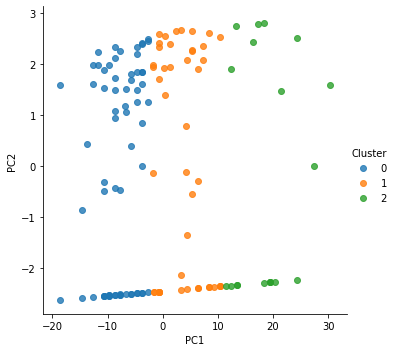

In [312]:
pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
pca_df.columns = ['PC1', 'PC2']
pca_df = pd.concat([pca_df, data['Cluster']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster', fit_reg=False)